# BAIT 508 Group Project: Industry Analysis

## Part 1. Quantitative Analysis of the Industry Sector

### A. Industry Sector Selection and Data Filtering

In [1]:
# Read the file
import pandas as pd

# Ensure the correct file path is provided
df_groups = pd.read_csv("major_groups.csv")
df_firms = pd.read_csv("public_firms.csv")


In [2]:
#Get a quick look of the major_groups data
print(df_groups.shape)
df_groups.head()


(83, 2)


,major_group,description
0,1,Agricultural Production Crops
1,2,Agriculture production livestock and animal sp...
2,7,Agricultural Services
3,8,Forestry
4,9,Fishing hunting and trapping


In [3]:
#Select the group with major_group = 13, which is "Oil and Gas Extraction"
df_groups[df_groups['major_group']==13]

,major_group,description
7,13,Oil And Gas Extraction


In [4]:
print(df_firms.shape)
df_firms.head()

(209212, 12)


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348


In [5]:
#Choose industry to analysis,13 is "Oil and Gas Extraction"
chosen_industry=13

a.How many unique firm-year ("fyear") observations are there in the filtered dataset?

In [6]:
#Convert to String
df_firms['sic']= df_firms['sic'].astype(str)

#Since the "major_group" is the first two digits of the "sic" code, we can filter the data by the first two digits of the "sic" code.
filtered_data=df_firms[df_firms['sic'].str[:2]==str(chosen_industry)]
number_of_unique_years=filtered_data['fyear'].nunique()
print(f"There are {number_of_unique_years} unique firm-years in the chosen industry with the code {chosen_industry}")

# Citation for the above code:
# Name: ChatGPT 4.0
# Chat Objective: How can I change number to the string in a dataframe in the python?
# URL: https://chatgpt.com/c/66fa1d49-4230-800c-8bc3-642cc952d2bc
# Date: 2024-09-29

There are 27 unique firm-years in the chosen industry with the code 13


b.How many unique firms are there in the filtered dataset?

In [7]:
# Use 'gvkey' as the identifier key in the firms dataframe.

number_of_unique_firms=filtered_data['gvkey'].nunique()
print(f"There are {number_of_unique_firms} unique firms in the chosen industry with the code {chosen_industry}")

# Citation for the above code:
# Name: ChatGPT 4.0
# Chat Objective: Here I asked ChatGPT for the definition of "gvkey", which is a unique identifier assigned  to companies, and it is maintained by S&P. Therefore, instead of using "conm" as the identifier key, I used "gvkey" as the identifier key in the firms dataframe.
# URL: https://chatgpt.com/c/66f99a6d-261c-8009-a958-7c4df3b1cead
# Date: 2024-09-29

There are 793 unique firms in the chosen industry with the code 13


c.How many firms in the filtered dataset have records over all 27 years (1994-2020)?

In [8]:
# Create a year list to store the year values from 1994 to 2020
year_list = list(range(1994, 2021))

# Group by 'gvkey' and count the number of unique years for each firm
unique_year_counts = filtered_data.groupby('gvkey')['fyear'].nunique()
num_of_firms_with_all_years = unique_year_counts[unique_year_counts == len(year_list)].count()
print(num_of_firms_with_all_years)


4


### B. Preliminary Analysis
1. What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?

In [9]:
# Filter the data for the year 2020
data_2020 = filtered_data[filtered_data['fyear'] == 2020]

# Sort the data by stock price in descending order and get the top 10 firms
top_10_stock_firms = data_2020.sort_values(by='prcc_c', ascending=False).head(20)

# Display the top 10 firms
top_10_stock_firms[['conm', 'prcc_c']]

,conm,prcc_c
141774,AMEN PROPERTIES INC,397.00
78479,RESERVE PETROLEUM CO,142.70
55752,PIONEER NATURAL RESOURCES CO,113.89
171337,CNOOC LTD,91.65
101901,CHENIERE ENERGY INC,60.03
2598,NABORS INDUSTRIES LTD,58.23
1398,HESS CORP,52.79
61911,EOG RESOURCES INC,49.87
189144,DIAMONDBACK ENERGY INC,48.40
21313,PRIMEENERGY RESOURCES CORP,43.17


2.	What are the top 10 firms with the highest sales (column "sale") in the entire history of the dataset?

In [10]:
# Group by 'conm' and sum the sales for each firm
grouped_data = filtered_data.groupby(['conm'])['sale'].sum().reset_index()

# Citation for the above code:
# Name: Copliot
# Chat Objective: Used copilot to fix the code
# Use of AI-generated result: Adding reset_index() to the end of the code.
# Date: 2024-09-28


# Sort the grouped data by sales in descending order and get the top 10 firms
top_10_firms_sales = grouped_data.sort_values(by='sale', ascending=False).head(10)

# Display the top 10 firms
top_10_firms_sales


,conm,sale
153,CONOCOPHILLIPS,1978601.000
411,MARATHON OIL CORP,693233.000
621,SCHLUMBERGER LTD,602360.768
237,ENTERPRISE PRODCT PARTNRS LP,510190.500
327,HALLIBURTON CO,473805.400
141,CNOOC LTD,453129.942
340,HESS CORP,436512.363
479,OCCIDENTAL PETROLEUM CORP,392093.000
442,MURPHY OIL CORP,231179.166
58,BAKER HUGHES INC,223515.294


3.	What is the geographical distribution (column "location") of all the firms? In other words, how many firms are there in each location? Please list the top 10 locations.


In [11]:
# Group by 'location' and count the number of firms in each location
location_counts = filtered_data['location'].value_counts()

# Get the top 10 locations
top_10_locations = location_counts.head(10)

# Display the top 10 locations
top_10_locations

USA    5981
CAN     415
GBR     122
BMU      96
AUS      77
FRA      44
NOR      40
NLD      36
CHE      30
LUX      28
Name: location, dtype: int64

4.	Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s) across the years. If you have selected multiple sectors, draw multiple lines to show them separately.


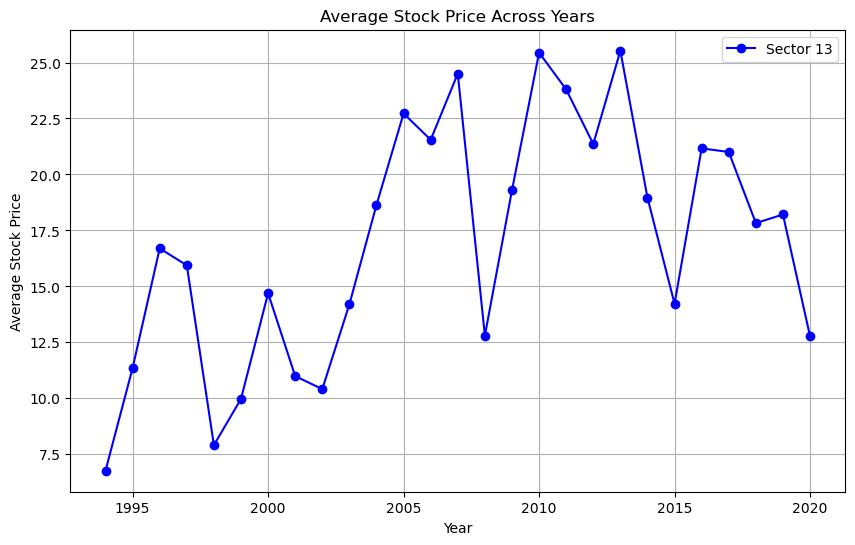

In [12]:
import matplotlib.pyplot as plt

# Calculate the average stock price for each year
average_stock_price = filtered_data.groupby('fyear')['prcc_c'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_stock_price.index, average_stock_price.values, marker='o', linestyle='-', color='b', label=f'Sector {chosen_industry}')
plt.xlabel('Year')
plt.ylabel('Average Stock Price')
plt.title('Average Stock Price Across Years')
plt.legend()
plt.grid(True)
plt.show()

5.	Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?


In [13]:
# Merge the stock price data for the years 2007 and 2008
data_2007 = filtered_data[filtered_data['fyear'] == 2007][['conm', 'prcc_c']].rename(columns={'prcc_c': 'prcc_c_2007'})
data_2008 = filtered_data[filtered_data['fyear'] == 2008][['conm', 'prcc_c']].rename(columns={'prcc_c': 'prcc_c_2008'})
merged_data = pd.merge(data_2007, data_2008, on='conm')

# Calculate the percentage drop in stock price from 2007 to 2008
merged_data['percentage_drop'] = ((merged_data['prcc_c_2007'] - merged_data['prcc_c_2008']) / merged_data['prcc_c_2007']) * 100

# Find the firm with the highest percentage drop
most_affected_firm = merged_data.loc[merged_data['percentage_drop'].idxmax()]

# Display the most affected firm
print(f"The firm most affected by the 2008 Financial Crisis is {most_affected_firm['conm']} with a percentage drop of {most_affected_firm['percentage_drop']:.2f}%")

The firm most affected by the 2008 Financial Crisis is BLACK RAVEN ENERGY INC with a percentage drop of 99.96%


6.	Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years. ROA is calculated as ni/asset.

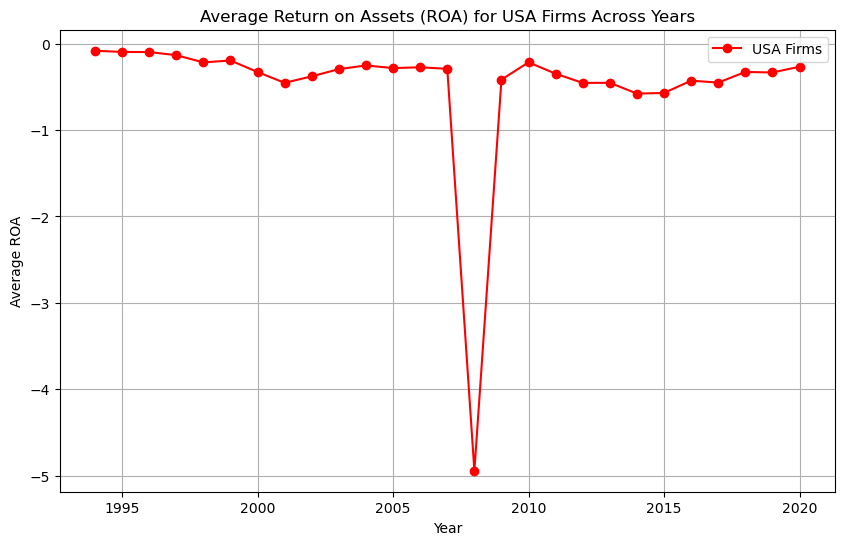

In [14]:
# Calculate ROA for USA firms
df_firms['roa'] = df_firms['ni'] / df_firms['asset']

# Filter for USA firms
usa_firms = df_firms[df_firms['location'] == 'USA']

# Calculate the average ROA for each year for USA firms
average_roa_usa = usa_firms.groupby('fyear')['roa'].mean()

# Plot the average ROA for USA firms across the years
plt.figure(figsize=(10, 6))
plt.plot(average_roa_usa.index, average_roa_usa.values, marker='o', linestyle='-', color='r', label='USA Firms')
plt.xlabel('Year')
plt.ylabel('Average ROA')
plt.title('Average Return on Assets (ROA) for USA Firms Across Years')
plt.legend()
plt.grid(True)
plt.show()

## Part 2. Text Analysis on the Industry Sector

### C. Text Cleaning

In [15]:
#Part C
df_items = pd.read_csv("2020_10K_item1_full.csv")
#Quick look of the data
df_items.head()

import string
from nltk.corpus import stopwords

# Download NLTK stopwords
import nltk
nltk.download('stopwords')

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the 'item_1' column and create a new column
df_items['item_1'] = df_items['item_1_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/novarqin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Part D Keyword Analysis

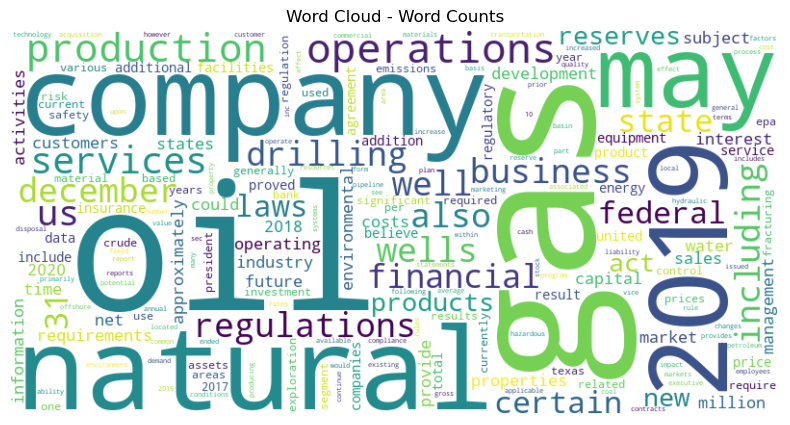

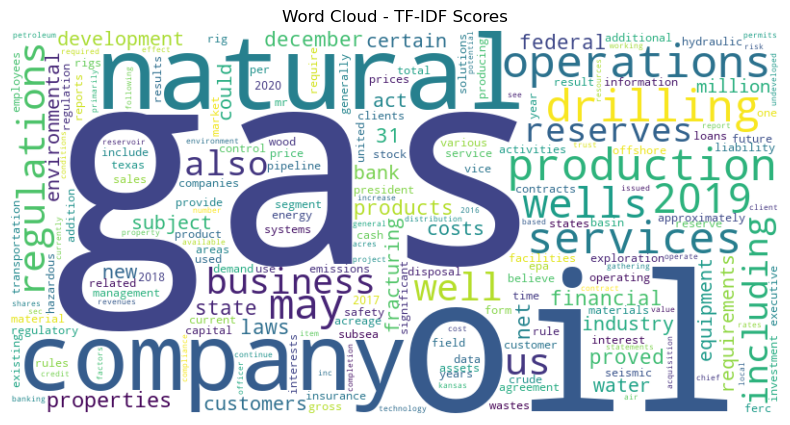

In [16]:
# Merge datasets using inner join on 'gvkey'
merged_df = pd.merge(df_items, filtered_data, on='gvkey', how='inner')

# Prepare the text data
text_data = merged_df['item_1']

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Method 1: Word counts
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(text_data)
count_array = count_matrix.toarray()

# Create a DataFrame for word counts
count_df = pd.DataFrame(count_array, columns=count_vectorizer.get_feature_names_out())
top_words_count = count_df.sum().sort_values(ascending=False)

# Method 2:TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
tfidf_array = tfidf_matrix.toarray()

# Create a DataFrame for TF-IDF
tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf_vectorizer.get_feature_names_out())
top_words_tfidf = tfidf_df.mean().sort_values(ascending=False)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create Word Cloud for Word Counts
wordcloud_count = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_count)

# Create Word Cloud for TF-IDF
wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_tfidf)

# Plot Word Cloud for Word Counts
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_count, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Word Counts')
plt.show()

# Plot Word Cloud for TF-IDF
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - TF-IDF Scores')
plt.show()

### E. Word Embedding

1.	Train a word2vec model with the full 10-K sample (e.g., "data/2020_10K_item1_full.csv"). Please use the cleaned text (e.g., results from Step C) for training.

In [17]:
from gensim.models import Word2Vec
import pandas as pd
import string
from nltk.corpus import stopwords
import nltk

# Load the data
#file_path = "/Users/zhaohanlin/Desktop/BAIT 508 final project/data/2020_10K_item1_full.csv"
#df = pd.read_csv(file_path)

if 'item_1' not in df_items.columns:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    def clean_text(text):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text

    df_items['item_1'] = df_items['item_1_text'].apply(clean_text)

# Prepare the text data for Word2Vec
sentences = df_items['item_1'].apply(lambda x: x.split()).tolist()

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
word2vec_model.savel")



In [18]:
# To load the model, you can use:
word2vec_model = Word2Vec.load("word2vec_10k.model")

In [19]:
# Get vocabulary
vocab = word2vec_model.wv.index_to_key
print(vocab[:10])


['may', 'company', 'products', 'us', 'business', 'product', 'including', 'also', 'services', '2019']


In [20]:
#Get a word vector for a word
word_vector = word2vec_model.wv['oil']  
print(word_vector)

[-1.1365638   1.5497496   2.9423513  -0.6694236  -2.3743525  -3.239664
  3.06401     0.31283647  0.8067016  -3.3004878   2.4253151   1.9032109
  1.9229997  -2.259175    1.199602   -0.7263365   1.4508744  -2.6112545
 -3.1888752   1.8013802   0.36506936 -3.1767461  -1.479351   -0.1671976
  1.7420709   1.0468527   1.8204755   0.71554357  0.9137551  -1.0506943
 -3.6996343   0.15851447  2.907795   -4.1574135   0.5156547   2.7325878
  5.829538    0.8238623  -0.7668244  -0.7593178  -1.648489   -2.3062356
  2.7648797   0.16903527  1.4930159   0.1443439   2.4300065   1.5458006
  1.976637    2.6494532   4.3987865   5.833168    3.0061297  -5.1247916
 -2.0066738   4.4390197   1.0630609   1.285551    1.842752   -0.8817912
 -2.1812854  -0.12938158  0.25515097 -3.3158963  -3.5811903   1.5904678
  1.9799699  -3.8194697   3.4458904  -1.57147    -0.8224265  -1.7138326
  0.04744109 -2.2810636  -1.4555486   1.0311532  -1.1587555   0.34438008
 -1.4079432  -0.87094826  0.13299194 -1.8743653  -1.4884727   3.

In [21]:
# Find a word most similar to a given word
similar_words = word2vec_model.wv.most_similar('oil', topn=10)  
print(similar_words)

[('natural', 0.6572077870368958), ('bpdcoffeyvillewynnewoodtotaltotal', 0.6547199487686157), ('stearin', 0.6502498388290405), ('flared', 0.6422545909881592), ('basrah', 0.6403483748435974), ('basisnatural', 0.6337668895721436), ('2017natural', 0.6322124600410461), ('eastex', 0.6306683421134949), ('petroleum', 0.6208783984184265), ('flue', 0.6133379936218262)]


In [22]:
# Check if 'word1' and 'word2' are in the vocabulary
similarity = word2vec_model.wv.similarity('oil', 'natural') 
print(similarity)


0.6572077


2.	Manually inspect the wordclouds you generated in D.3 and choose three representative keywords that are relevant to the industry sector of your interest. Utilize the trained word2vec model to find the most relevant five words for each of these three keywords.

In [23]:
# Manually chosen representative keywords from the wordclouds
keywords = ['oil', 'natural', 'gas']

# Find the most relevant five words for each of these three keywords using the trained word2vec model
for keyword in keywords:
    if keyword in word2vec_model.wv:
        similar_words = word2vec_model.wv.most_similar(keyword, topn=5)
        print(f"Most relevant words for '{keyword}':")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    else:
        print(f"'{keyword}' is not in the vocabulary.")

Most relevant words for 'oil':
  natural: 0.6572
  bpdcoffeyvillewynnewoodtotaltotal: 0.6547
  stearin: 0.6502
  flared: 0.6423
  basrah: 0.6403
Most relevant words for 'natural':
  2527natural: 0.7380
  basrah: 0.6959
  2017natural: 0.6819
  uruguaiana: 0.6803
  chromatographs: 0.6802
Most relevant words for 'gas':
  gaspowered: 0.7399
  gasrelated: 0.7371
  gasfueled: 0.7182
  gasfired: 0.7085
  gasproducing: 0.7001


## Part 3. Comprehensive Analysis of One Sample Firm

In [24]:
# Make sure Python file "DocumentSimilarity.ppy is in the same folder as our Jupyter notebook
from DocumentSimilarity import DocumentSimilarity

In [25]:
from gensim.models import Word2Vec
import numpy as np

# Load the trained word2vec model
word2vec_model = Word2Vec.load("word2vec_10k.model")

# Function to get the embedding for a given text
def get_text_embedding(text, model):
    words = text.split()
    word_embeddings = [model.wv[word] for word in words if word in model.wv]
    if word_embeddings:
        return np.sum(word_embeddings, axis=0)  
    else:
        return np.zeros(model.vector_size)

# Create firm-level embeddings by summing up the embeddings for each firm's documents
firm_embeddings = {}
for firm in merged_df['conm'].unique():
    firm_texts = merged_df[merged_df['conm'] == firm]['item_1']
    firm_embedding = np.sum([get_text_embedding(text, word2vec_model) for text in firm_texts], axis=0)
    firm_embeddings[firm] = firm_embedding

# Display the firm-level embeddings
for firm, embedding in firm_embeddings.items():
    print(f"Embedding for '{firm}':\n{embedding}\n")

# Citation for the above code:
# Name: Copliot
# Chat Objective: Used copilot to generate code for firm-level embeddings
# Use of AI-generated result: Code as above
# Date: 2024-10-02

Embedding for 'DEEP WELL OIL & GAS INC':
[ 14733.69     -6570.068      222.69107   8482.774   -29357.467
  -1086.0759    3112.114   -12193.654    20441.684   -38905.66
  12905.689     6420.9805   32086.29    -34806.195     3859.5107
  -2378.1064   18662.64    -13275.049   -12787.776    31351.656
  -2753.3328  -27334.555    -5220.903     4963.8745    1968.0326
   5867.0703   24225.973     8081.186     4053.0574  -14661.521
 -55282.91       151.38016  10673.973    -3264.136    18016.99
   8465.587    27191.7      20247.32      9952.733     7266.293
  -4595.9043    4538.179    33733.2      19144.387    17040.117
  -2405.07     29853.707    29768.545    -2247.8357  -15341.213
 -17047.61     37720.84      8415.907   -14685.033    -6050.052
  -3845.3247   12275.929    -1006.4653   16292.377    10616.845
  -9844.994     6862.073   -15891.188   -15714.331   -31675.588
   7093.93     44469.523   -39448.504    18225.592   -20615.383
 -15644.257   -17103.803   -26867.004    -6430.4897  -19481.928

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Ensure firm_embeddings is defined
if 'firm_embeddings' not in globals():
    firm_embeddings = {}

# Get the embedding for focal firm
focal_firm = 'DIAMONDBACK ENERGY INC'
focal_firm_embedding = firm_embeddings.get(focal_firm)

if focal_firm_embedding is not None:
    similarities = {}
    for firm, embedding in firm_embeddings.items():
        if firm != focal_firm:
            similarity = cosine_similarity([focal_firm_embedding], [embedding])[0][0]
            similarities[firm] = similarity

    # Sort the firms by similarity in descending order
    sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

    # Get the top 5 competing firms
    top_competing_firms = sorted_similarities[:5]

    # Display the top 5 competing firms
    print(f"Top 5 competing firms for {focal_firm}:")
    for firm, similarity in top_competing_firms:
        print(f"{firm}: {similarity:.4f}")
else:
    print(f"{focal_firm}'s embedding is not available.")

# Citation for the above code:
# Name: Copliot
# Chat Objective: Used copilot to fix the code that find similar companies
# Use of AI-generated result: Code as above, with minor modifications. Added "ensure firm_embeddings is defined" and "similarities = {}" to the code.
# Date: 2024-10-03


Top 5 competing firms for DIAMONDBACK ENERGY INC:
OASIS PETROLEUM INC: 0.9928
LONESTAR RESOURCES US INC: 0.9879
LAREDO PETROLEUM INC: 0.9866
CONTANGO OIL & GAS CO: 0.9843
KIMBELL ROYALTY PARTNERS LP: 0.9818


In [27]:
# Display the columns in the merged_df DataFrame
print(merged_df.columns)

Index(['cik', 'year', 'name', 'item_1_text', 'gvkey', 'item_1', 'fyear',
       'location', 'conm', 'ipodate', 'sic', 'prcc_c', 'ch', 'ni', 'asset',
       'sale', 'roa'],
      dtype='object')


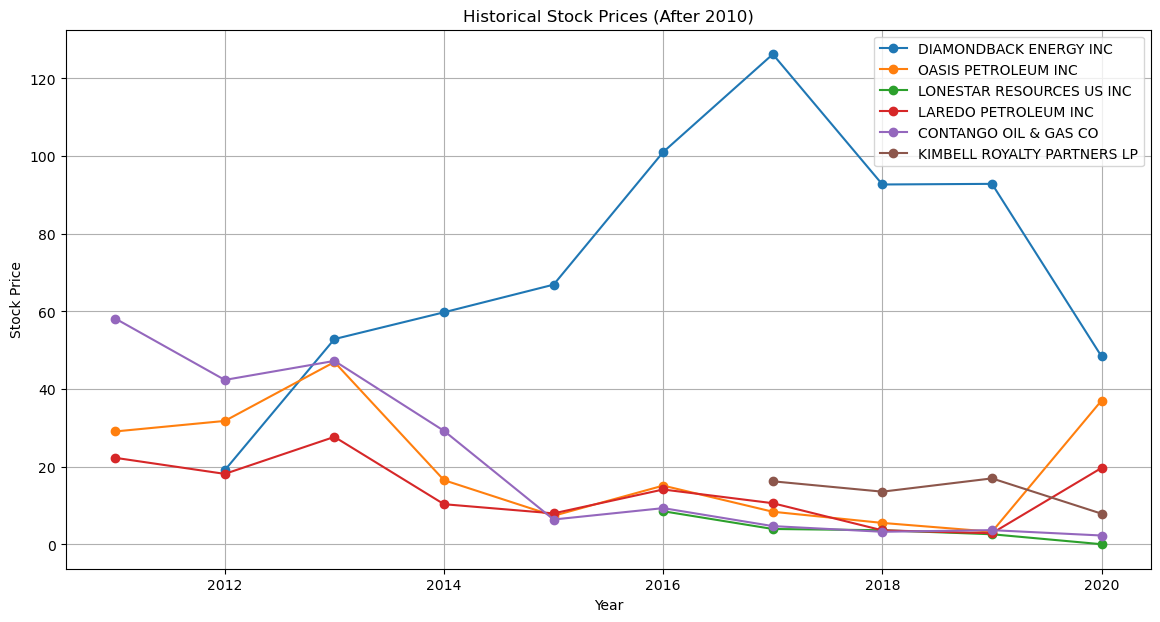

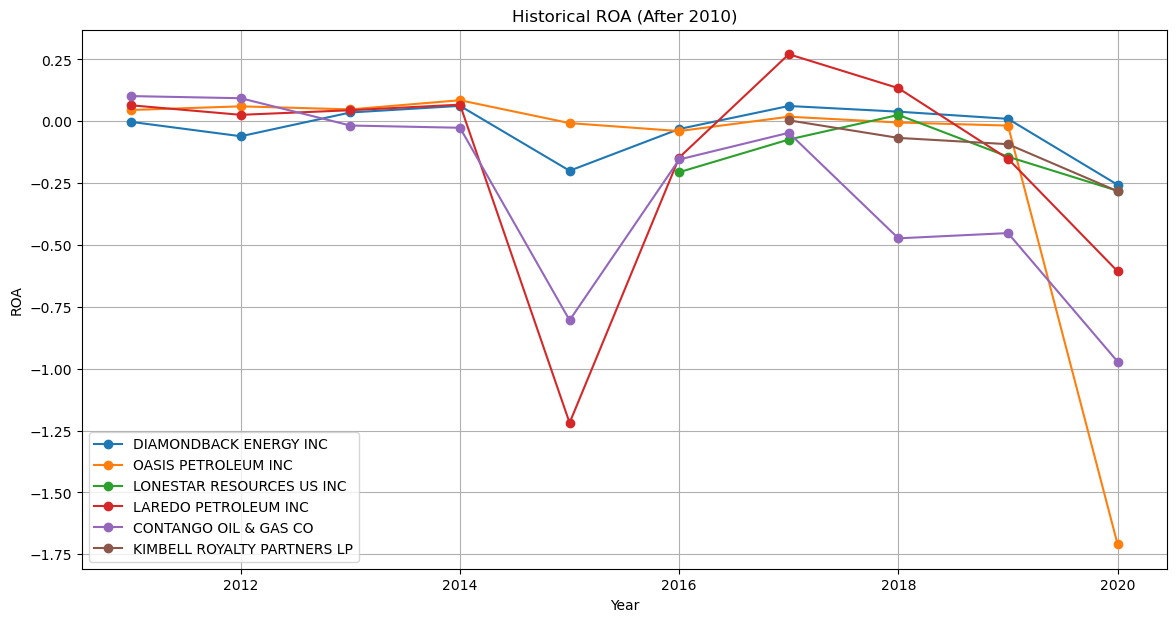

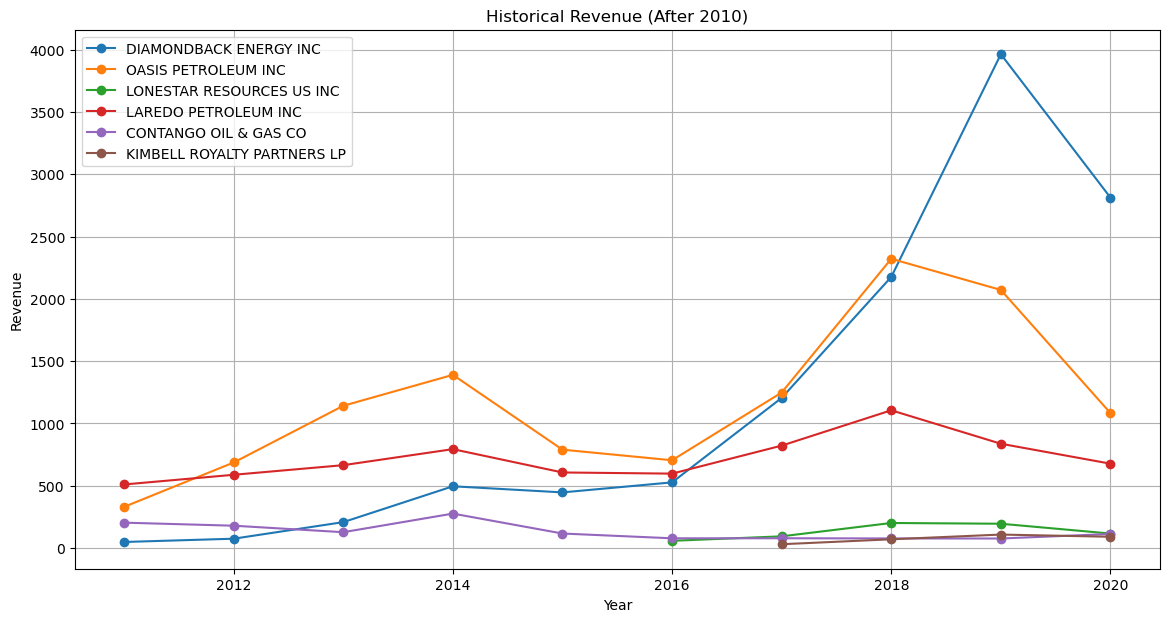

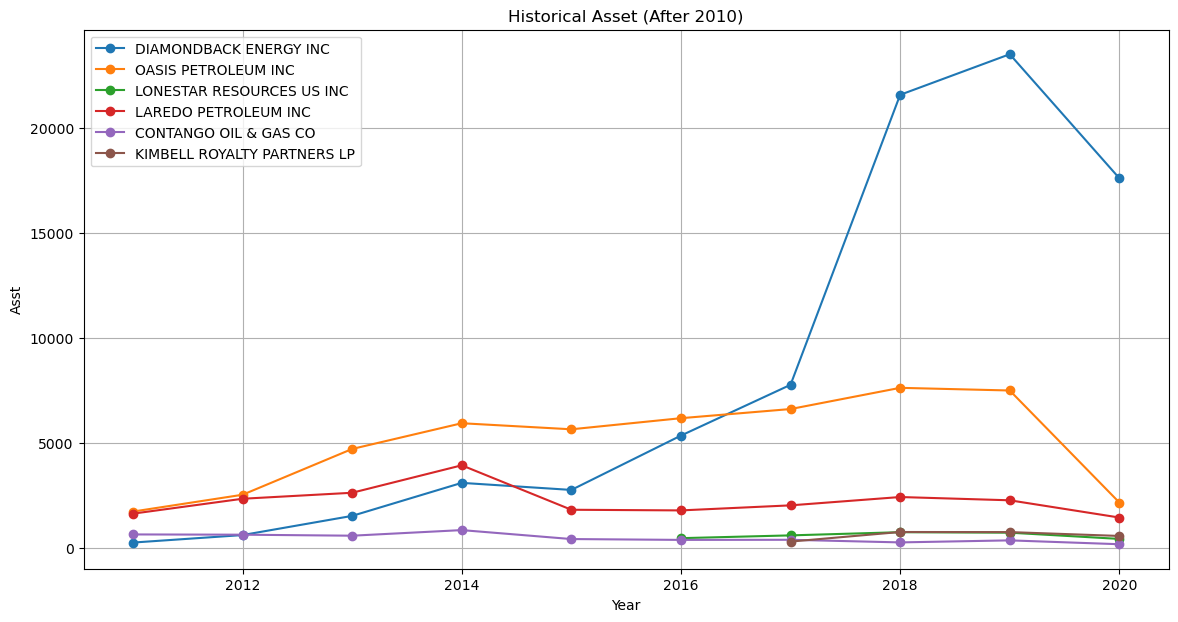

In [30]:
# Define the firms to compare
firms_to_compare = [focal_firm] + [firm for firm, _ in top_competing_firms]

import matplotlib.pyplot as plt

# Plot the stock price for the companies
plt.figure(figsize=(14, 7))
for firm in firms_to_compare:
    firm_data = merged_df[(merged_df['conm'] == firm) & (merged_df['fyear'] > 2010)]
    plt.plot(firm_data['fyear'], firm_data['prcc_c'], marker='o', label=firm)

plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('Historical Stock Prices (After 2010)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the historical ROA for the companies
plt.figure(figsize=(14, 7))
for firm in firms_to_compare:
    firm_data = merged_df[(merged_df['conm'] == firm) & (merged_df['fyear'] > 2010)]
    plt.plot(firm_data['fyear'], firm_data['roa'], marker='o', label=firm)

plt.xlabel('Year')
plt.ylabel('ROA')
plt.title('Historical ROA (After 2010)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the historical revenue for the companies
plt.figure(figsize=(14, 7))
for firm in firms_to_compare:
    firm_data = merged_df[(merged_df['conm'] == firm) & (merged_df['fyear'] > 2010)]
    plt.plot(firm_data['fyear'], firm_data['sale'], marker='o', label=firm)

plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Historical Revenue (After 2010)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the asset for the companies
plt.figure(figsize=(14, 7))
for firm in firms_to_compare:
    firm_data = merged_df[(merged_df['conm'] == firm) & (merged_df['fyear'] > 2010)]
    plt.plot(firm_data['fyear'], firm_data['asset'], marker='o', label=firm)

plt.xlabel('Year')
plt.ylabel('Asst')
plt.title('Historical Asset (After 2010)')
plt.legend()
plt.grid(True)
plt.show()

